In [1]:
import zipfile
import random
import tensorflow as tf
from tensorflow import keras
import h5py
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *

from keras import optimizers
import scipy
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import imageio
import pandas as pd
from keras.models import *



2024-10-17 16:31:49.253888: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-17 16:31:49.263035: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-17 16:31:49.273392: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-17 16:31:49.276381: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-17 16:31:49.283896: I tensorflow/core/platform/cpu_feature_guar

In [2]:
tf.keras.backend.clear_session(
    free_memory=True
)

In [3]:
train_data_dir = '/home/user/Desktop/personal/linkon/Alzheimer/ADNI/Alzheimers-ADNI/train'



print(os.listdir(train_data_dir))
test_data_dir = '/home/user/Desktop/personal/linkon/Alzheimer/ADNI/Alzheimers-ADNI/test'



print(os.listdir(test_data_dir))





['Final AD JPEG', 'Final LMCI JPEG', 'Final EMCI JPEG', 'Final MCI JPEG', 'Final CN JPEG']
['Final AD JPEG', 'Final LMCI JPEG', 'Final EMCI JPEG', 'Final MCI JPEG', 'Final CN JPEG']


In [ ]:
train_images = []
train_labels = []

for folder in os.listdir(train_data_dir):
    subfolder_path2=os.path.join(train_data_dir,folder)
    for image_filename in os.listdir(subfolder_path2):
        image_path = os.path.join(subfolder_path2, image_filename)
        train_images.append(image_path)
        train_labels.append(folder)
train_df= pd.DataFrame({'image': train_images, 'label': train_labels})
train_df

image          label
0      /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
1      /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
2      /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
3      /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
4      /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
...                                                  ...            ...
16195  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG
16196  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG
16197  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG
16198  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG
16199  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG

[16200 rows x 2 columns]

In [5]:
test_images = []
test_labels = []

for folder in os.listdir(test_data_dir):
    subfolder_path2=os.path.join(test_data_dir,folder)
    for image_filename in os.listdir(subfolder_path2):
        image_path = os.path.join(subfolder_path2, image_filename)
        test_images.append(image_path)
        test_labels.append(folder)
test_df= pd.DataFrame({'image': test_images, 'label': test_labels})
test_df

image          label
0     /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
1     /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
2     /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
3     /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
4     /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
...                                                 ...            ...
2570  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG
2571  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG
2572  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG
2573  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG
2574  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG

[2575 rows x 2 columns]

In [6]:
all_df = pd.concat([train_df, test_df], axis=0)
all_df = all_df.reset_index(drop=True)
all_df['label'].value_counts()

label
Final CN JPEG      8650
Final AD JPEG      8346
Final MCI JPEG     1155
Final EMCI JPEG     480
Final LMCI JPEG     144
Name: count, dtype: int64

In [7]:
all_df_edited = all_df.sample(frac=1, random_state=42).reset_index(drop=True)
all_df_edited.head()

image          label
0  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG
1  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG
2  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
3  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
4  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG

In [8]:
all_df_edited['label'] =all_df_edited['label'].replace({'Final CN JPEG': 'CN', 'Final AD JPEG': 'AD',
                                                        'Final MCI JPEG': 'MCI', 'Final EMCI JPEG': 'EMCI',
                                                        'Final LMCI JPEG': 'LMCI'})
all_df_edited.head()

image label
0  /home/user/Desktop/personal/linkon/Alzheimer/A...    CN
1  /home/user/Desktop/personal/linkon/Alzheimer/A...    CN
2  /home/user/Desktop/personal/linkon/Alzheimer/A...    AD
3  /home/user/Desktop/personal/linkon/Alzheimer/A...    AD
4  /home/user/Desktop/personal/linkon/Alzheimer/A...    CN

/tmp/ipykernel_204616/3004188932.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=all_df_edited.label, palette='Set2')


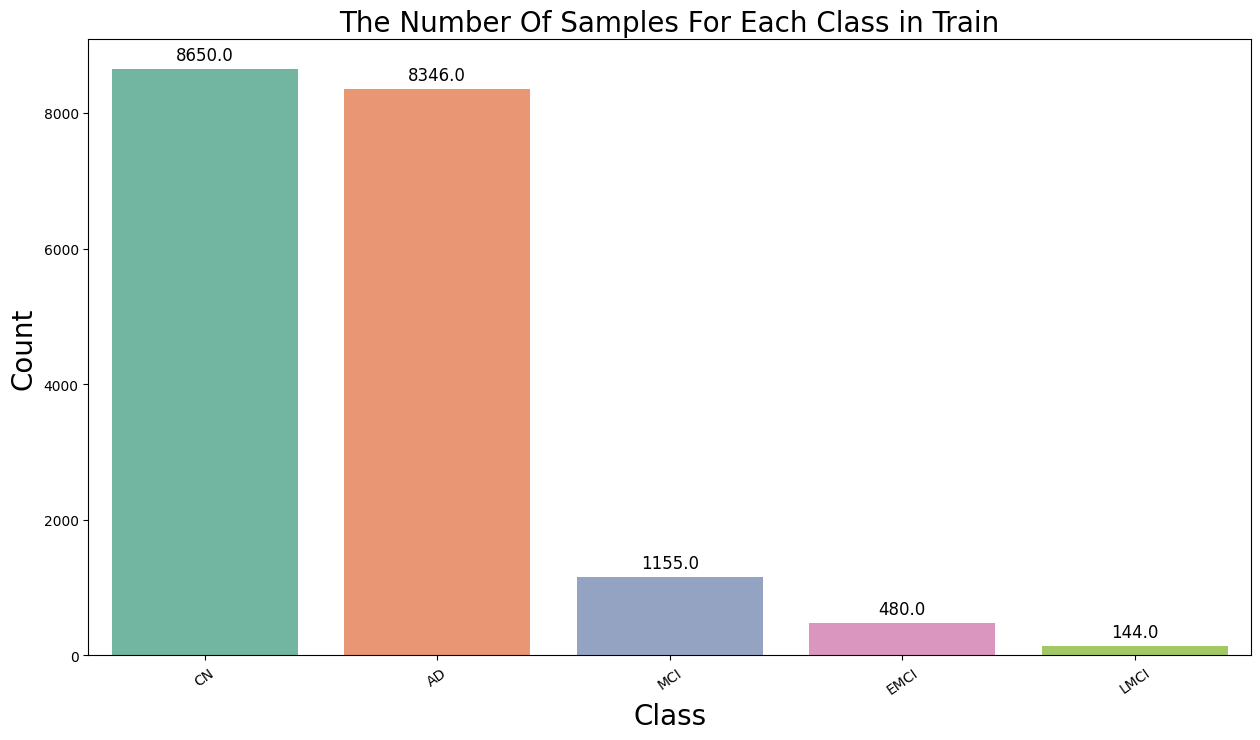

In [9]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x=all_df_edited.label, palette='Set2')
ax.set_xlabel("Class", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title('The Number Of Samples For Each Class in Train', fontsize=20)
plt.grid(False)
plt.xticks(rotation=35)

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points', 
                fontsize=12)

plt.show()

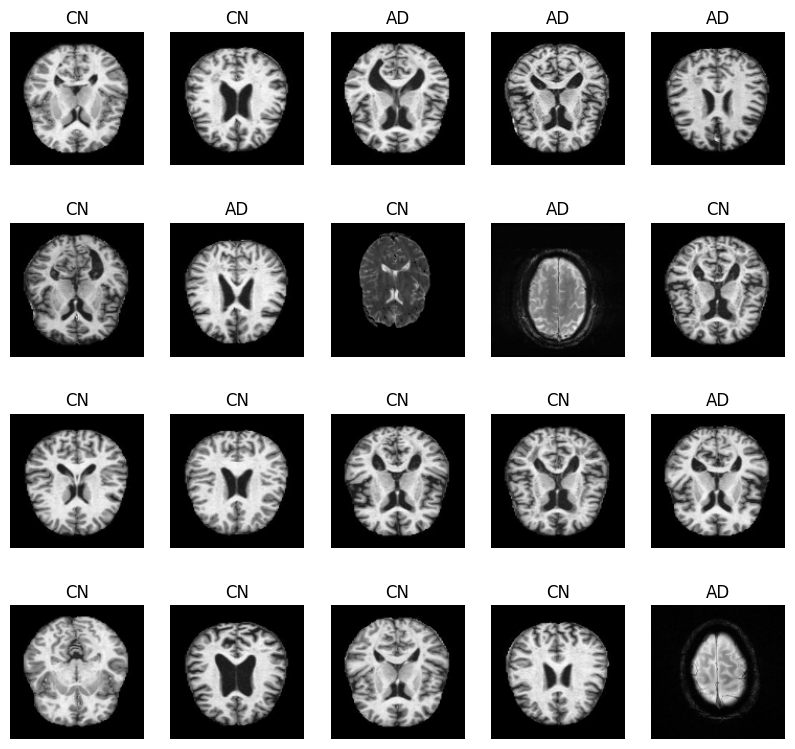

In [10]:
plt.figure(figsize=(10,12))

for n,i in enumerate(np.random.randint(0,len(all_df_edited),20)):
    plt.subplot(5,5,n+1)
    img=cv2.imread(all_df_edited.image[i])
    img=cv2.resize(img,(128,128))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(all_df_edited.label[i],fontsize=12)

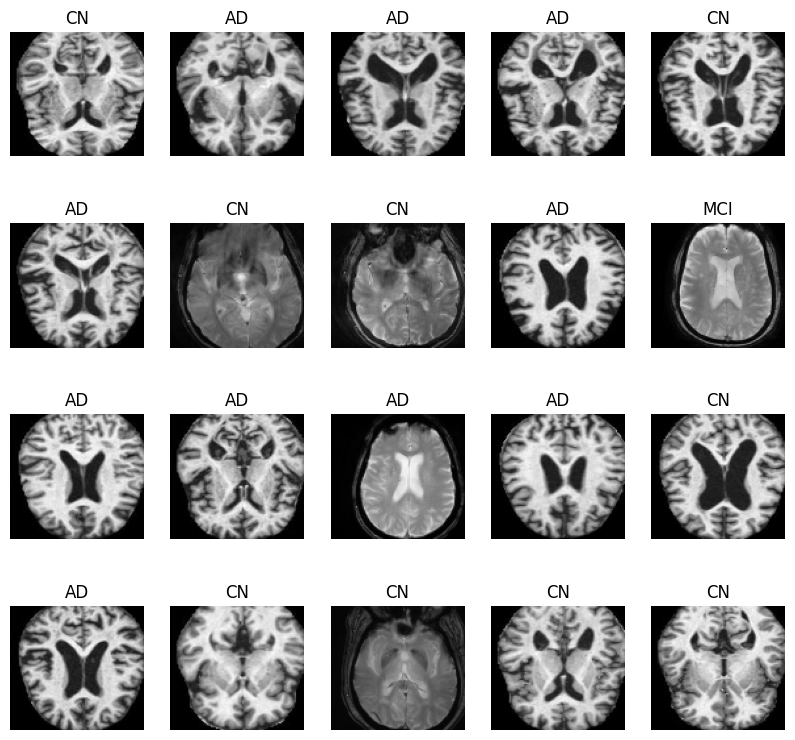

In [11]:
plt.figure(figsize=(10,12))

for n,i in enumerate(np.random.randint(0,len(all_df_edited),20)):
    plt.subplot(5,5,n+1)
    img=cv2.imread(all_df_edited.image[i])
    img=cv2.resize(img,(128,128))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    cropped_image = img[20:115, 8:110]
    plt.imshow(cropped_image)
    plt.axis('off')
    plt.title(all_df_edited.label[i],fontsize=12)

In [12]:
temp_df_edited, test_df_edited = train_test_split(all_df_edited, test_size=0.15, stratify=all_df_edited['label'], random_state=43)
train_df_edited, val_df_edited = train_test_split(temp_df_edited, test_size=0.15, stratify=temp_df_edited['label'], random_state=43)


train_df_edited = train_df_edited.reset_index(drop=True)
val_df_edited = val_df_edited.reset_index(drop=True)
test_df_edited = test_df_edited.reset_index(drop=True)
train_df_edited.shape, test_df_edited.shape, val_df_edited.shape

((13564, 2), (2817, 2), (2394, 2))

/tmp/ipykernel_204616/1169724873.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=test_df_edited.label, palette='Set2')


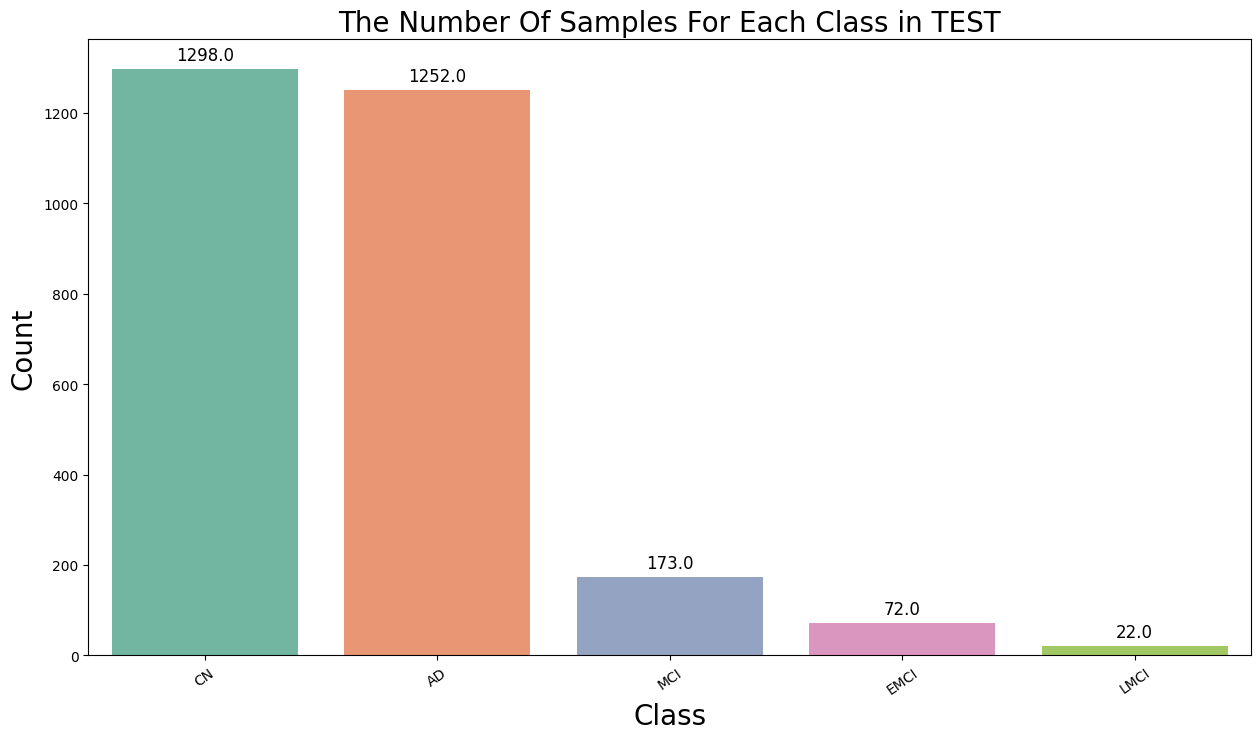

In [13]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x=test_df_edited.label, palette='Set2')
ax.set_xlabel("Class", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title('The Number Of Samples For Each Class in TEST', fontsize=20)
plt.grid(False)
plt.xticks(rotation=35)

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points', 
                fontsize=12)

plt.show()

/tmp/ipykernel_204616/3995720465.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=train_df_edited.label, palette='Set2')


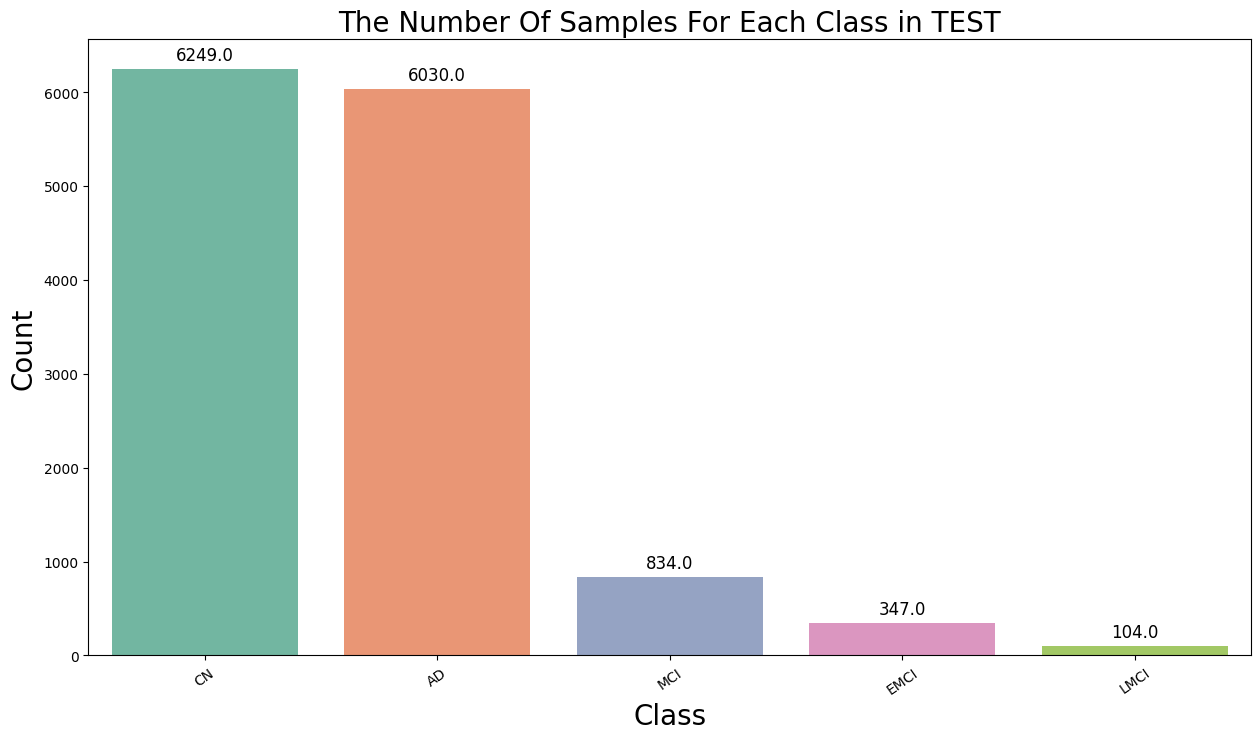

In [14]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x=train_df_edited.label, palette='Set2')
ax.set_xlabel("Class", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title('The Number Of Samples For Each Class in TEST', fontsize=20)
plt.grid(False)
plt.xticks(rotation=35)

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points', 
                fontsize=12)

plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.utils import to_categorical

In [16]:
# image = cv2.imread('/home/user/Desktop/personal/linkon/Alzheimer/ADNI/new/axial_masked_edited/AD/I31143_100.jpg')
        
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image_rgb = cv2.rotate(image_rgb, cv2.ROTATE_90_CLOCKWISE)
# plt.imshow(image_rgb)

In [17]:
def load_resize_normalize_data(df, target_size=(128, 128)):
    images = []
    labels = []
    
    label_encoder = LabelEncoder()
    for index, row in df.iterrows():
   
        image_path = row['image']
        image = cv2.imread(image_path)
        

        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)# Convert to RGB format
        # image_rgb = cv2.rotate(image_rgb, cv2.ROTATE_90_CLOCKWISE)
        resized_image = cv2.resize(image_rgb, (128,128))
        # resized_image = resized_image[20:115, 8:110]
#         resized_image = resized_image[15:115,18:120]
        # resized_image =cv2.resize(resized_image, None, fx=2.2,fy=1.5)
        

        normalized_image = resized_image / 255.0 
        
        # Store the resized and normalized image and its corresponding label
        images.append(normalized_image)
        labels.append(row['label'])
  
    encoded_labels_lb = label_encoder.fit_transform(labels)
    
    class_mapping ={  'AD':0,'CN':1, 'EMCI': 2, 'LMCI': 3, 'MCI':4}
    
    y_mapped =df['label'].map(class_mapping)
    y_one_hot = to_categorical(y_mapped, num_classes=5)
    return np.array(images), np.array(encoded_labels_lb), label_encoder.classes_, y_one_hot




In [18]:
train_images, train_encoded_labels, classes, train_one_hot = load_resize_normalize_data(train_df_edited)



In [19]:
train_datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, 
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, 
     horizontal_flip=True)

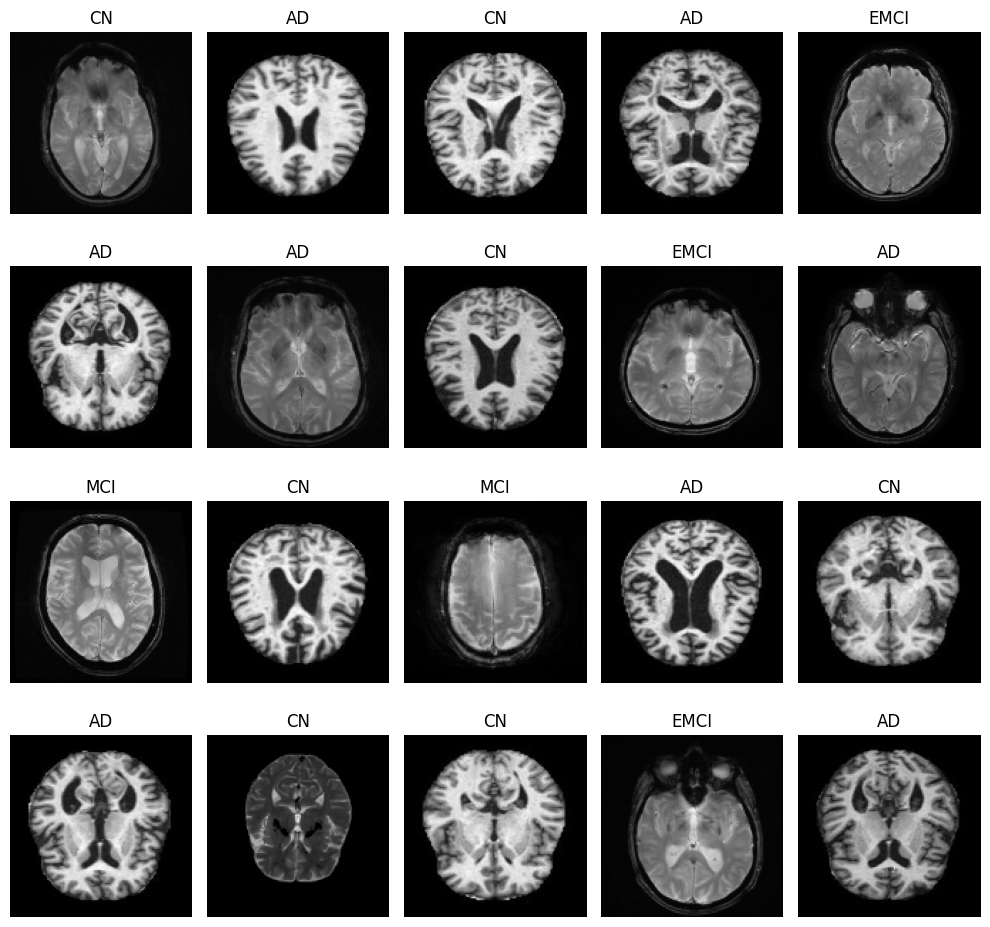

In [20]:
label_decoder = {0:'AD', 1: 'CN', 2: 'EMCI', 3: 'LMCI', 4: 'MCI'}

plt.figure(figsize=(10, 12))

for n, i in enumerate(np.random.randint(0, len(train_images), 20)):
    plt.subplot(5, 5, n + 1)
    img = train_images[i]
    plt.imshow(img)
    plt.axis('off')
    plt.title(label_decoder[train_encoded_labels[i]], fontsize=12)

plt.tight_layout()

# Train Data Balance

In [21]:
df_train = pd.DataFrame({'image': list(train_images), 'label': train_encoded_labels})

minority_classes = [ 2, 3, 4] # EMCI, LMCI, MCI
majority_class = 0 # CN
most_major = 1# AD

In [22]:
minority_dfs = [df_train[df_train['label'] == c] for c in minority_classes]
majority_df = df_train[df_train['label'] == majority_class]
most_major_df = df_train[df_train['label'] == most_major]

In [23]:
num_majority = 3000

In [24]:
augmented_images = []
augmented_labels = []

for minority_df in minority_dfs:
    num_minority = len(minority_df)
    num_to_augment = num_majority - num_minority

    if num_to_augment > 0:  # Only augment if necessary
        minority_images = np.array(minority_df['image'].tolist())
        minority_labels = np.array(minority_df['label'].tolist())

        augmented_minority_images = []
        augmented_minority_labels = []

        total_augmented_images = 0
        batch_size = 8

        

        while total_augmented_images < num_to_augment:
            batch_images, batch_labels = next(train_datagen.flow(minority_images, minority_labels, batch_size=batch_size))

            remaining_to_augment = num_to_augment - total_augmented_images
            images_to_add = min(remaining_to_augment, batch_size)

            augmented_minority_images.extend(batch_images[:images_to_add])
            augmented_minority_labels.extend(batch_labels[:images_to_add])

            total_augmented_images += images_to_add
            if total_augmented_images % 200 == 0:
                print(f'{total_augmented_images} images augmented so far')

        augmented_images.extend(augmented_minority_images)
        augmented_labels.extend(augmented_minority_labels)

200 images augmented so far
400 images augmented so far
600 images augmented so far
800 images augmented so far
1000 images augmented so far
1200 images augmented so far
1400 images augmented so far
1600 images augmented so far
1800 images augmented so far
2000 images augmented so far
2200 images augmented so far
2400 images augmented so far
2600 images augmented so far
200 images augmented so far
400 images augmented so far
600 images augmented so far
800 images augmented so far
1000 images augmented so far
1200 images augmented so far
1400 images augmented so far
1600 images augmented so far
1800 images augmented so far
2000 images augmented so far
2200 images augmented so far
2400 images augmented so far
2600 images augmented so far
2800 images augmented so far
200 images augmented so far
400 images augmented so far
600 images augmented so far
800 images augmented so far
1000 images augmented so far
1200 images augmented so far
1400 images augmented so far
1600 images augmented so f

In [25]:
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)


balanced_images = np.concatenate([np.array(df_train[df_train['label'] == c]['image'].tolist()) for c in minority_classes] + [augmented_images], axis=0)
balanced_labels = np.concatenate([np.array(df_train[df_train['label'] == c]['label'].tolist()) for c in minority_classes] + [augmented_labels], axis=0)

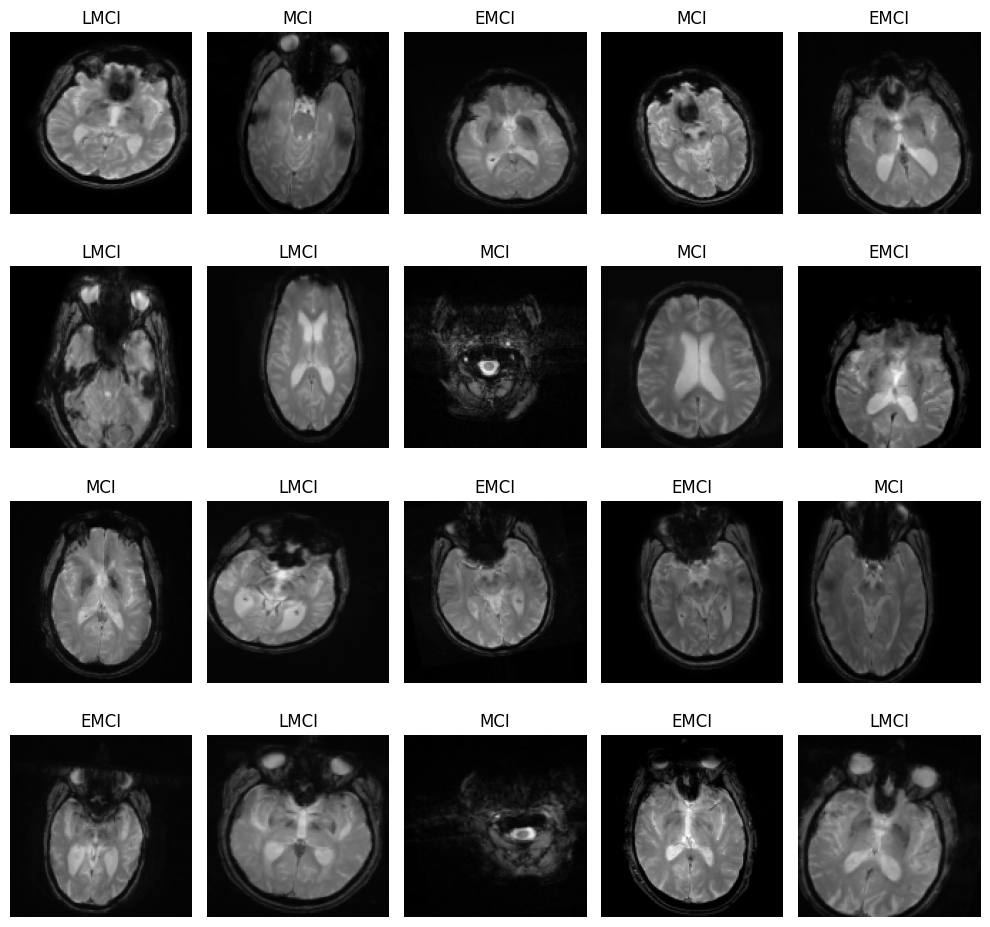

In [26]:
# train_gen = train_datagen.flow(train_images, train_one_hot, batch_size=8, shuffle=True)
label_decoder = {0:'AD', 1: 'CN', 2: 'EMCI', 3: 'LMCI', 4: 'MCI'}
plt.figure(figsize=(10, 12))

for n, i in enumerate(np.random.randint(0, len(balanced_images), 20)):
    plt.subplot(5, 5, n + 1)
    img = balanced_images[i]
    plt.imshow(img)
    plt.axis('off')
    plt.title(label_decoder[balanced_labels[i]], fontsize=12)

plt.tight_layout()
plt.show()

In [27]:
majority_images = np.concatenate((np.array(majority_df['image'].tolist()), np.array(most_major_df['image'].tolist())), axis=0)
majority_labels = np.concatenate((np.array(majority_df['label'].tolist()), np.array(most_major_df['label'].tolist())), axis=0)
majority_images.shape

(12279, 128, 128, 3)

In [28]:
all_train_images= np.concatenate((majority_images, balanced_images), axis=0)
all_train_labels= np.concatenate((majority_labels, balanced_labels), axis=0)
all_train_images.shape, all_train_labels.shape

((21279, 128, 128, 3), (21279,))

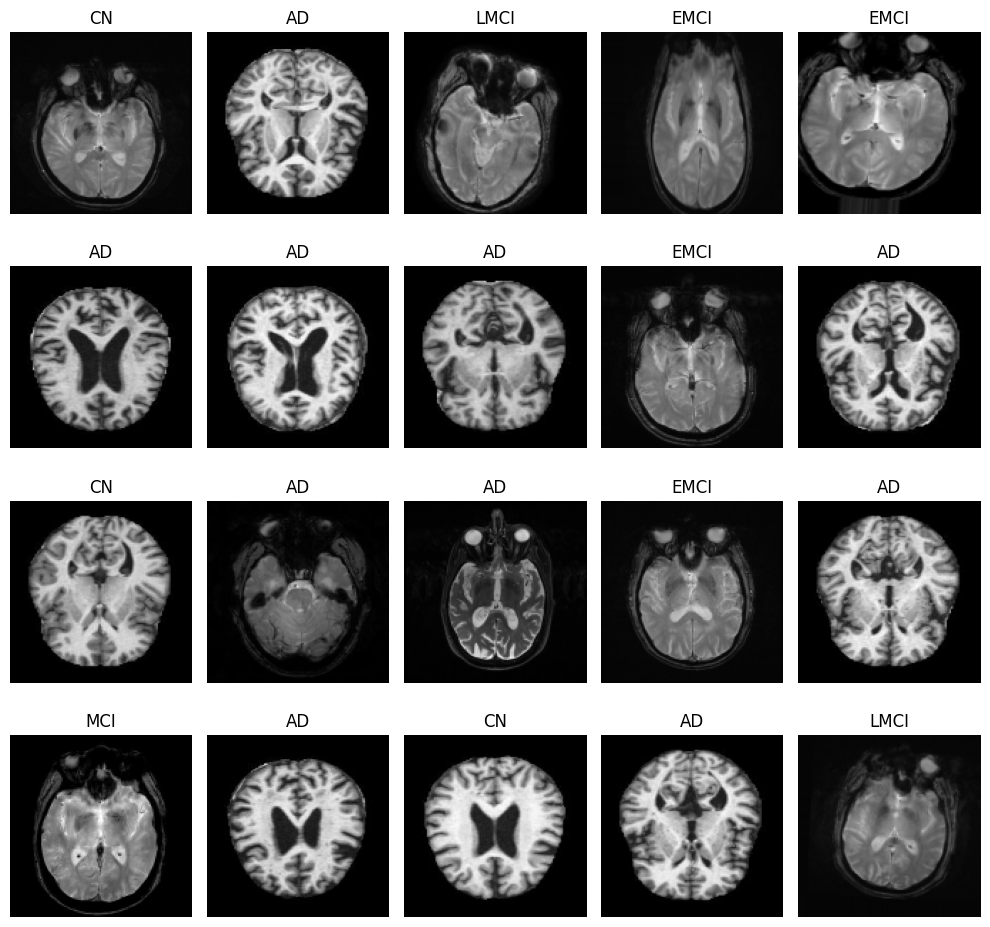

In [29]:
label_decoder = {0:'AD', 1: 'CN', 2: 'EMCI', 3: 'LMCI', 4: 'MCI'}
plt.figure(figsize=(10, 12))

for n, i in enumerate(np.random.randint(0, len(all_train_images), 20)):
    plt.subplot(5, 5, n + 1)
    img = all_train_images[i]
    plt.imshow(img)
    plt.axis('off')
    plt.title(label_decoder[all_train_labels[i]], fontsize=12)

plt.tight_layout()
plt.show()

/tmp/ipykernel_204616/1590062880.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=all_train_labels, palette='Set2')


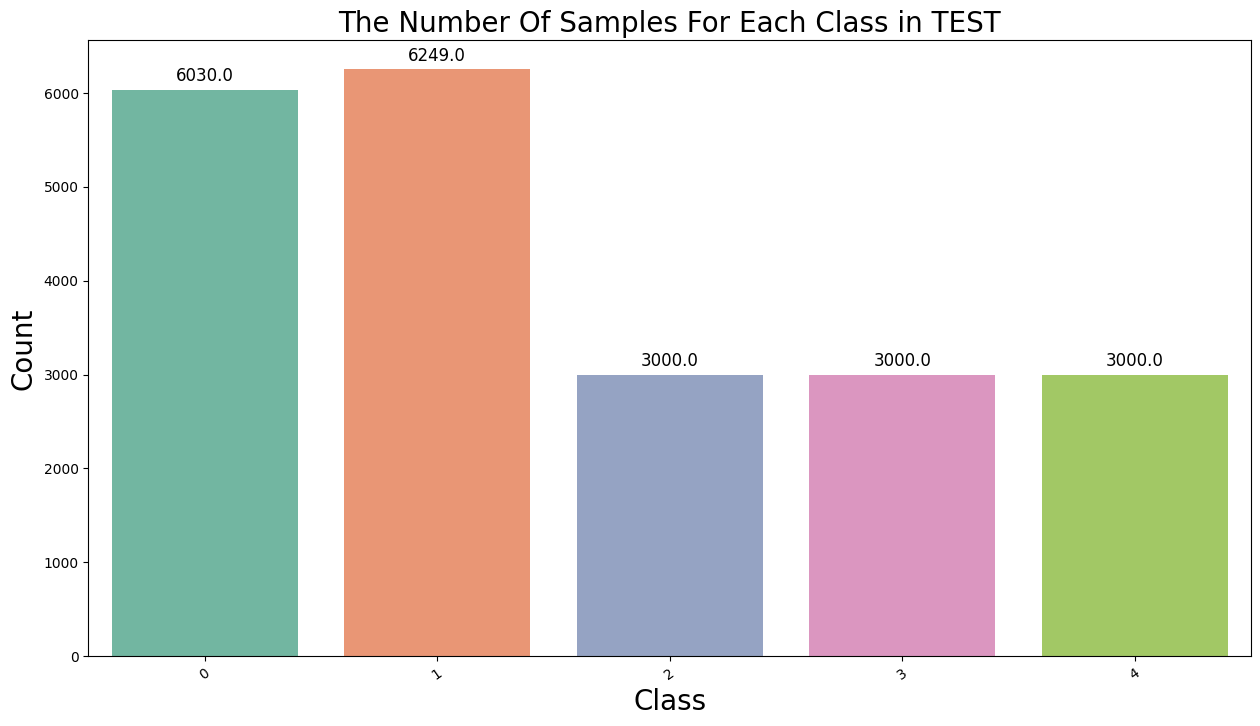

In [30]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x=all_train_labels, palette='Set2')
ax.set_xlabel("Class", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title('The Number Of Samples For Each Class in TEST', fontsize=20)
plt.grid(False)
plt.xticks(rotation=35)

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points', 
                fontsize=12)

plt.show()

# Val Processing

In [31]:
val_images, val_encoded_labels, val_classes, val_one_hot = load_resize_normalize_data(val_df_edited)



In [32]:
print("Shape of images array:", val_images.shape)
print("Shape of encoded labels array:", val_encoded_labels.shape)
print("Classes:", val_classes)
# print("One HOt clases:", val_one_hot)
print("One HOt clases:", val_one_hot.shape)

Shape of images array: (2394, 128, 128, 3)
Shape of encoded labels array: (2394,)
Classes: ['AD' 'CN' 'EMCI' 'LMCI' 'MCI']
One HOt clases: (2394, 5)


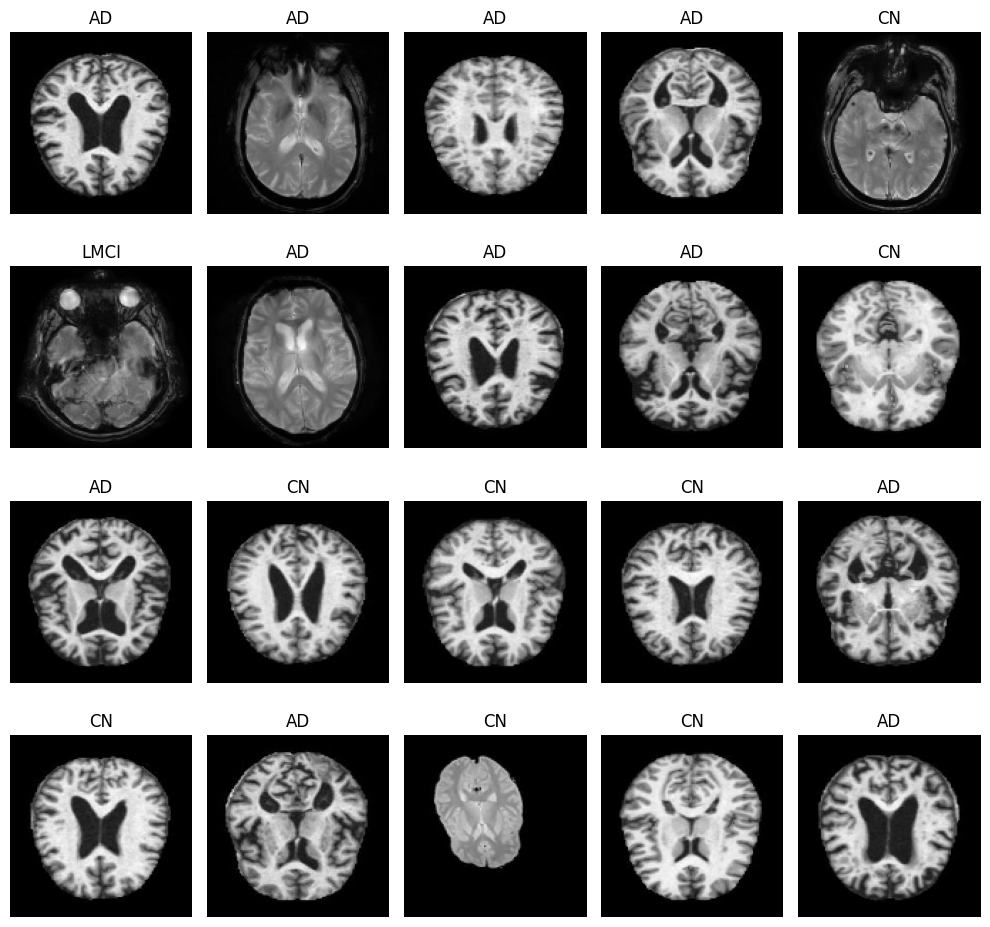

In [33]:
label_decoder = {0:'AD', 1: 'CN', 2: 'EMCI', 3: 'LMCI', 4: 'MCI'}

plt.figure(figsize=(10, 12))

for n, i in enumerate(np.random.randint(0, len(val_images), 20)):
    plt.subplot(5, 5, n + 1)
    img = val_images[i]
    plt.imshow(img)
    plt.axis('off')
    plt.title(label_decoder[val_encoded_labels[i]], fontsize=12)

plt.tight_layout()
plt.show()

# Test preprocessing

In [34]:
test_images, test_encoded_labels, test_classes, test_one_hot = load_resize_normalize_data(test_df_edited)



In [35]:
print("Shape of images array:", test_images.shape)
print("Shape of encoded labels array:", test_encoded_labels.shape)
print("Classes:", test_classes)
# print("One HOt clases:", test_one_hot)
print("One HOt clases:", test_one_hot.shape)

Shape of images array: (2817, 128, 128, 3)
Shape of encoded labels array: (2817,)
Classes: ['AD' 'CN' 'EMCI' 'LMCI' 'MCI']
One HOt clases: (2817, 5)


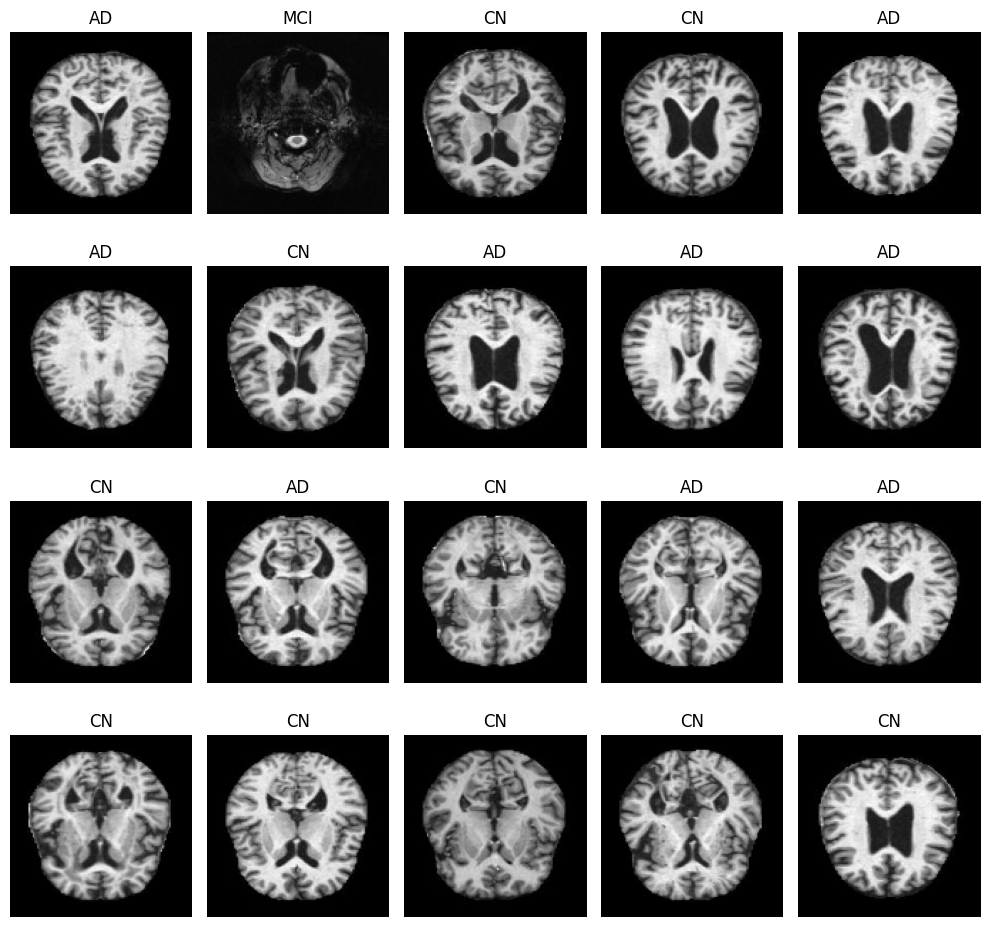

In [36]:
label_decoder = {0:'AD', 1: 'CN', 2: 'EMCI', 3: 'LMCI', 4: 'MCI'}

plt.figure(figsize=(10, 12))

for n, i in enumerate(np.random.randint(0, len(test_images), 20)):
    plt.subplot(5, 5, n + 1)
    img = test_images[i]
    plt.imshow(img)
    plt.axis('off')
    plt.title(label_decoder[test_encoded_labels[i]], fontsize=12)

plt.tight_layout()
plt.show()

# Data generator

In [37]:
valid_datagen = ImageDataGenerator(
    preprocessing_function=None 
)


In [38]:
batch_size=8
val_gen = valid_datagen.flow(val_images, val_one_hot, batch_size=8, shuffle=False)
test_gen = valid_datagen.flow(test_images, test_one_hot, batch_size=1, shuffle=False)

In [39]:
from keras import backend as K

IMG_CHANNELS=3
IMG_WIDTH = 128
IMG_HEIGHT = 128

if K.image_data_format() == 'channels_first':
    input_shape = (IMG_CHANNELS, IMG_WIDTH, IMG_HEIGHT)
else:
    input_shape = (IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)

In [40]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.layers import *
initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(
        initial_learning_rate,
        decay_steps=10000,
        decay_rate=0.8,
        staircase=True)


print(lr_schedule.get_config())


{'initial_learning_rate': 0.0001, 'decay_steps': 10000, 'decay_rate': 0.8, 'staircase': True, 'name': 'ExponentialDecay'}


In [41]:
class ExpandDimsLayer(Layer):
    def __init__(self, axis, **kwargs):
        super(ExpandDimsLayer, self).__init__(**kwargs)
        self.axis = axis

    def call(self, inputs):
        return tf.expand_dims(inputs, axis=self.axis)

In [42]:
class Reshapelayer(Layer):
    def __init__(self, dim, **kwargs):
        super(Reshapelayer, self).__init__(**kwargs)
        self.dim = dim

    def call(self, inputs):
        return tf.reshape(inputs, [tf.shape(inputs)[0], self.dim, 1])

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.dim, 1)
    
    
class ReduceMeanLayer(Layer):
    def __init__(self, axis, **kwargs):
        super(ReduceMeanLayer, self).__init__(**kwargs)
        self.axis = axis

    def call(self, inputs):
        return tf.reduce_mean(inputs, axis=self.axis)

In [43]:
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

In [44]:
class RootMeanSquaredError(tf.keras.metrics.Metric):
    def __init__(self, name='rmse', **kwargs):
        super(RootMeanSquaredError, self).__init__(name=name, **kwargs)
        self.mse = tf.keras.metrics.MeanSquaredError()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.mse.update_state(y_true, y_pred, sample_weight)

    def result(self):
        return tf.sqrt(self.mse.result())

    def reset_states(self):
        self.mse.reset_states()

In [45]:
class SpatialAttention(tf.keras.layers.Layer):
    def __init__(self, kernel_size):
        super(SpatialAttention, self).__init__()
        self.kernel_size = kernel_size
        
    def build(self, input_shape):
        self.conv2d = tf.keras.layers.Conv2D(filters = 1,
                    kernel_size=self.kernel_size,
                    strides=1,
                    padding='same',
                    activation='sigmoid',
                    kernel_initializer='he_normal',
                    use_bias=False)

    def call(self, inputs):
        avg_pool = tf.keras.layers.Lambda(lambda x: tf.keras.backend.mean(x, axis=3, keepdims=True))(inputs)
            
            # MaxPool
        max_pool = tf.keras.layers.Lambda(lambda x: tf.keras.backend.max(x, axis=3, keepdims=True))(inputs)

        attention = tf.keras.layers.Concatenate(axis=3)([avg_pool, max_pool])

        attention = self.conv2d(attention)


        return tf.keras.layers.multiply([inputs, attention])

In [46]:
def multires_block2D(U, x, alpha=1.67, strides=1):
    kernel_initializer = 'he_normal'
    W = U * alpha
    shortcut = Conv2D(int(W*0.167) + int(W*0.333) + int(W*0.5), kernel_size=(1, 1), padding='same',
                      use_bias=False, kernel_initializer=kernel_initializer)(x)
    
    # Multi-resolution paths with Conv2D
    conv6 = Conv2D(int(W*0.167), kernel_size=(3, 3), padding='same', use_bias=False,
                   kernel_initializer=kernel_initializer)(shortcut)
    conv11 = Conv2D(int(W*0.333), kernel_size=(3, 3), padding='same', use_bias=False,
                    kernel_initializer=kernel_initializer)(conv6)
    conv17 = Conv2D(int(W*0.5), kernel_size=(3, 3), padding='same', use_bias=False,
                    kernel_initializer=kernel_initializer)(conv11)
    
    # Concatenate the multi-resolution outputs
    out = tf.keras.layers.concatenate([conv6, conv11, conv17], axis=-1)
    out = LayerNormalization(axis=-1)(out, training=True)
    
    # Add the skip connection
    out = Add()([out, shortcut])
    
    # Final Conv2D layer with strides
    out = Conv2D(int(W*0.167) + int(W*0.333) + int(W*0.5), kernel_size=(5, 5), padding='same',
                 strides=strides, use_bias=False, kernel_initializer=kernel_initializer)(out)
    out = Activation('relu')(out)
    out = LayerNormalization(axis=-1)(out, training=True)
    
    return out

In [47]:
def line1(x):
    # received shape: (64, 64, 3)
    kernel_ ='he_normal'
    conv_1 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer = kernel_)(x)

    
    block1_conv1 = Conv2D(32, (1, 1), activation='relu', padding='same', kernel_initializer = kernel_)(conv_1)
    block1_pool = MaxPool2D(2, 2)(block1_conv1)

    block2_conv1 = Conv2D(64, (7, 7), activation='relu', padding='same', kernel_initializer = kernel_)(block1_pool)
    block2_pool = MaxPool2D(2, 2)(block2_conv1)
  
    return block2_pool

def line2(x):
    # received shape: (32, 32, 3)


    conv_1 = Conv2D(16, (7, 7), activation='relu', padding='same')(x)
    conv_1 = BatchNormalization()(conv_1, training=True)
    conv_1 = Dropout(0.3)(conv_1)


    block1_conv1 = Conv2D(64, (5, 5), activation='relu', padding='same')(conv_1)
    block1_conv1 = BatchNormalization()(block1_conv1, training=True)
    block1_conv1 = MaxPool2D(2, 2)(block1_conv1)


    return block1_conv1

def line3(x):
    # received shape: (16, 16, 3)


    conv_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    conv_1 = LayerNormalization()(conv_1)

    block1_conv1 = Conv2D(16, (2, 2), activation='relu', padding='same')(conv_1)
    block1_conv1 = LayerNormalization()(block1_conv1)

    block2_conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(block1_conv1)
    block2_pool = AvgPool2D(2, 2)(block2_conv1)

    return block2_pool



def line4(x):
    conv_1 = Conv2D(32, (5, 5), activation='relu', padding='same')(x)
    conv_1 = Conv2D(64, (14, 14), activation='relu', padding='same')(conv_1)
    conv_1 = MaxPool2D(pool_size=(2,2))(conv_1)
    conv_1 = BatchNormalization()(conv_1, training=True)
#     reshaped = Reshape((conv_1.shape[1] * conv_1.shape[2], conv_1.shape[3]))(conv_1)
#     lstm_1 = LSTM(32, return_sequences=True)(reshaped)
#     query_attn = GroupQueryAttention(head_dim=128,num_query_heads=8,num_key_value_heads=4)
#     attention= query_attn(query =conv_1, value= conv_1)

    return conv_1

def line5(x):
    conv_1 = Conv2D(128, (5,5), activation='relu', padding='same')(x)
    conv_1 = Dropout(0.2)(conv_1)
    conv_1 = BatchNormalization()(conv_1)
    
    
    multires_block_1 = multires_block2D(U=32, x= conv_1)
    multires_block_1 = BatchNormalization()(multires_block_1)
    multires_block_1 = multires_block2D(U=64, x= multires_block_1)

    
    reshaped = Reshape((multires_block_1.shape[1] * multires_block_1.shape[2], multires_block_1.shape[3]))(multires_block_1)

    
  
    lstm1 = Bidirectional(LSTM(32, return_sequences=True))(reshaped)
#     out = Dense(128, activation='relu')(lstm1)
    return lstm1

In [48]:
def get_model(num_classes):
    
    signal = Input(shape=(128, 128, 3), dtype=np.float32, name='signal')
    


    # converting to (32, 32, 3):
    conv_1 = Conv2D(64, (5,5), activation='relu', padding='same', strides=1)(signal)
    conv_1 = MaxPool2D(pool_size=(2,2))(conv_1)  # (32, 32, 3)
    f1_conv= line1(conv_1)


    # converting to (16, 16, 3):
    conv_1 = Conv2D(256, (5, 5), activation='relu', padding='same', strides=1)(conv_1)
    conv_1 = MaxPool2D(pool_size=(2,2))(conv_1)  # (16, 16, 3)
    conv_1 = Conv2D(128, (9,9), activation='relu', padding='same', strides=1)(conv_1)
    f2_conv = line2(conv_1)
    spat_atten = SpatialAttention(8)
    f2_conv = spat_atten(f2_conv)
    
    concat_1 = keras.layers.concatenate([f1_conv, f2_conv], axis=-1)

    # converting to (8, 8, 3):
    

    conv_1 = Conv2D(128, (5, 5), activation='relu', padding='same', strides=1)(conv_1)
    conv_1 = MaxPool2D(2)(conv_1)  
    f3_conv= line3(conv_1)
    print(f3_conv.shape)
#     f3_conv_reshaped = Reshape((f3_conv.shape[1] * f3_conv.shape[2], f3_conv.shape[3]))(f3_conv)

    
    
    # converting to (8, 8, 3): # same input line4 function
    f4_conv= line4(conv_1)
    concat_2 = keras.layers.concatenate([f3_conv, f4_conv], axis=-1)
    
    concat_1 = Dropout(0.3)(concat_1)
    print(concat_1.shape, concat_2.shape)
    xm = MultiHeadAttention(num_heads=8, key_dim=32*8)(concat_1, concat_2)
    print(xm.shape)
    
    
    f_lstm = line5(conv_1)
    f5 = line5(xm)
#     concat_3 = Concatenate(axis=1)([f_lstm, f5])
    query_attn = GroupQueryAttention(head_dim=128,num_query_heads=8,num_key_value_heads=4)
    xm= query_attn(query =f5, value= f_lstm)

#     xm = MultiHeadAttention(num_heads=8, key_dim=32*8)(f5, f_lstm)
    block1_conv1 = Conv2D(64, (7, 7), activation='leaky_relu', padding='same')(ExpandDimsLayer(axis=-1)(xm))
    block1_conv1 = MaxPooling2D(pool_size=(3,3))(block1_conv1)
    block1_conv1 = LayerNormalization()(block1_conv1)
    block1_conv1 = Conv2D(32, (3,3), activation='leaky_relu', padding='same')(block1_conv1)
    block1_conv1 = MaxPooling2D(pool_size=(2,2))(block1_conv1)
    block1_conv1 = LayerNormalization()(block1_conv1)
    block1_conv1 = Conv2D(16, (5,5), activation='leaky_relu', padding='same')(block1_conv1)
    block1_conv1 = LayerNormalization()(block1_conv1)
    #concat = ReduceMeanLayer(axis=2)(concat)# old code
    avg_pool = GlobalAveragePooling2D()(block1_conv1)
#=====================================================================================
    dense_1 = Dense(128, activation='relu')(avg_pool)
    dense_1 = Dense(32, activation='relu')(dense_1)
    out = Dense(num_classes, activation='softmax')(dense_1)

    model = Model(inputs=signal, outputs=[out])
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate),  metrics=[tf.keras.metrics.CategoricalAccuracy(
                    name='accuracy'),tf.keras.metrics.Recall(name='Recall'),tf.keras.metrics.Precision(name='Precision'), 
                    tf.keras.metrics.AUC(num_thresholds=200,curve="ROC",summation_method="interpolation",name="AUC",dtype=None,thresholds=None,
                    multi_label=True,label_weights=None,),
                    tf.keras.metrics.FalsePositives(), tf.keras.metrics.FalseNegatives(),
                    F1Score(name='f1_score'),
                    tf.keras.metrics.MeanAbsoluteError(name='MAE'),
                    tf.keras.metrics.MeanAbsolutePercentageError(name='MAPE'),
                    RootMeanSquaredError(name='RMSE')]) 
    
    return model

if __name__ == "__main__":
    model = get_model(5)
    model.summary()

I0000 00:00:1729161151.505487  204616 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729161151.527895  204616 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729161151.528027  204616 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729161151.528811  204616 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

(None, 8, 8, 64)
(None, 16, 16, 128) (None, 8, 8, 128)
(None, 16, 16, 128)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ signal (InputLayer) │ (None, 128, 128,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │      4,864 │ signal[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    409,856 │ max_pooling2d[0]… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 32, 32,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │  2,654,336 │ max_pooling2d_3[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │    100,368 │ conv2d_5[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 32, 32,    │    409,728 │ conv2d_5[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32, 32,    │         64 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 16, 16,    │          0 │ conv2d_9[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 16, 16, 8) │      9,224 │ max_pooling2d_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │      4,128 │ conv2d_1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │     25,664 │ dropout[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 16, 16, 8) │         16 │ conv2d_10[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                 

 Total params: 7,293,481 (27.82 MB)

 Trainable params: 7,292,477 (27.82 MB)

 Non-trainable params: 1,004 (3.92 KB)

In [49]:
# tf.keras.utils.plot_model(model, to_file='./Proposed_Model.png')


In [50]:

from tensorflow.keras.callbacks import Callback 
class LearningRateSchedulerWithPatienceIoU(Callback):
    def __init__(self, reduce_lr_factor, patience, min_lr, monitor='val_iou'):
        super(LearningRateSchedulerWithPatienceIoU, self).__init__()
        self.reduce_lr_factor = reduce_lr_factor
        self.patience = patience
        self.min_lr = min_lr
        self.monitor = monitor
        self.wait = 0
        self.best_iou = -float('inf')
#         self.model = model
        
    def on_epoch_end(self, epoch, logs=None):
        current_iou = logs.get(self.monitor, -float('inf'))
        
        if current_iou > self.best_iou:
            self.best_iou = current_iou
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                new_lr = self.model.optimizer.learning_rate.numpy() * self.reduce_lr_factor
                print(new_lr)
                new_lr = max(new_lr, self.min_lr)
                
                self.model.optimizer.learning_rate.assign(new_lr)
                print(f"\nReduced learning rate to {new_lr} after {self.patience} epochs without improvement in IoU.\n")
                self.wait = 0





In [51]:
# initial_learning_rate = 0.00075  # Initial learning rate
# reduce_lr_factor = 0.5  # Factor by which to reduce the learning rate
# patience = 1  # Number of epochs without improvement in IoU before reducing learning rate
# min_learning_rate = 1e-6  # Minimum learning rate

# # Create the custom learning rate scheduler
# lr_scheduler = LearningRateSchedulerWithPatienceIoU(reduce_lr_factor, patience, min_learning_rate)

In [52]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_plateu = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-6, verbose=1)

In [53]:
train_one_hot.shape

(13564, 5)

In [54]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = "/home/user/Desktop/personal/linkon/Alzheimer/Code/Weights/adni-5-class-balanced-16_oct-axial_multoresnet.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [55]:
# model.load_weights(checkpoint_path)
all_train_one_hot = to_categorical(all_train_labels, num_classes=5)

In [56]:
train_gen = valid_datagen.flow(all_train_images, all_train_one_hot, batch_size=8, shuffle= True)

In [57]:

history = model.fit(train_gen,epochs=50, validation_data=val_gen,  callbacks=[checkpoint, lr_plateu],verbose=1)


Epoch 1/50


/home/user/anaconda3/envs/ecg-3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-10-17 12:21:37.118147: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_1/dropout_3_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-10-17 12:21:38.312782: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
W0000 00:00:1729146098.359438  180055 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146098.370346  180055 gpu_timer.cc:114] Skipping

   1/2660 ━━━━━━━━━━━━━━━━━━━━ 11:54:21 16s/step - AUC: 0.2750 - MAE: 0.3194 - MAPE: 159716320.0000 - Precision: 0.0000e+00 - RMSE: 0.4003 - Recall: 0.0000e+00 - accuracy: 0.1250 - f1_score: 0.0000e+00 - false_negatives: 8.0000 - false_positives: 0.0000e+00 - loss: 1.6054

W0000 00:00:1729146104.534812  180057 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146104.536462  180057 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146104.537969  180057 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146104.539484  180057 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146104.541386  180057 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146104.543421  180057 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146104.545134  180057 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146104.546774  180057 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146104.548290  180057 gp

2017/2660 ━━━━━━━━━━━━━━━━━━━━ 1:08 107ms/step - AUC: 0.7613 - MAE: 0.2751 - MAPE: 137551584.0000 - Precision: 0.3240 - RMSE: 0.3662 - Recall: 0.0360 - accuracy: 0.3773 - f1_score: 0.0629 - false_negatives: 7619.4209 - false_positives: 469.4879 - loss: 1.2531

W0000 00:00:1729146320.584087  180056 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146320.585487  180056 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146320.586775  180056 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146320.588090  180056 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146320.589263  180056 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146320.590425  180056 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146320.591917  180056 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146320.593191  180056 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146320.594697  180056 gp

2660/2660 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - AUC: 0.7667 - MAE: 0.2714 - MAPE: 135706832.0000 - Precision: 0.3661 - RMSE: 0.3642 - Recall: 0.0563 - accuracy: 0.3812 - f1_score: 0.0943 - false_negatives: 9755.2041 - false_positives: 904.8323 - loss: 1.2275

W0000 00:00:1729146404.127458  180058 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146404.128714  180058 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146404.129999  180058 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146404.131082  180058 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146404.132162  180058 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146404.133345  180058 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146404.134360  180058 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146404.135615  180058 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146404.136765  180058 gp


Epoch 1: val_accuracy improved from -inf to 0.41646, saving model to /home/user/Desktop/personal/linkon/Alzheimer/Code/Weights/adni-5-class-balanced-16_oct-axial_multoresnet.keras


W0000 00:00:1729146405.134566  180058 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146405.135730  180058 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146405.136891  180058 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146405.138100  180058 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146405.139262  180058 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146405.140399  180058 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146405.141539  180058 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146405.142701  180058 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729146405.144264  180058 gp

2660/2660 ━━━━━━━━━━━━━━━━━━━━ 317s 113ms/step - AUC: 0.7667 - MAE: 0.2714 - MAPE: 135704336.0000 - Precision: 0.3661 - RMSE: 0.3642 - Recall: 0.0563 - accuracy: 0.3812 - f1_score: 0.0944 - false_negatives: 9758.4600 - false_positives: 905.5641 - loss: 1.2275 - val_AUC: 0.7678 - val_MAE: 0.2480 - val_MAPE: 124024200.0000 - val_Precision: 0.3892 - val_RMSE: 0.3435 - val_Recall: 0.0902 - val_accuracy: 0.4165 - val_f1_score: 0.1465 - val_false_negatives: 2178.0000 - val_false_positives: 339.0000 - val_loss: 1.0158 - learning_rate: 1.0000e-04
Epoch 2/50
2660/2660 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - AUC: 0.8258 - MAE: 0.2402 - MAPE: 120086648.0000 - Precision: 0.5143 - RMSE: 0.3457 - Recall: 0.2421 - accuracy: 0.4503 - f1_score: 0.3290 - false_negatives: 7952.8018 - false_positives: 2413.8315 - loss: 1.0075
Epoch 2: val_accuracy improved from 0.41646 to 0.58814, saving model to /home/user/Desktop/personal/linkon/Alzheimer/Code/Weights/adni-5-class-balanced-16_oct-axial_multoresnet.keras
26

In [58]:
import pandas as pd

history_df = pd.DataFrame()


for col in history.history.keys():
    history_df[col] = history.history[col]

history_df.head()
history_df.to_csv('./Proposed_model_5_class_adni_balanced-multiresnet-model_16_oct.csv', index=False)

In [57]:
model.load_weights(checkpoint_path)

/home/user/anaconda3/envs/ecg-3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 268 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [58]:
# print(model.evaluate(atrain_images, all_train_one_hot))

In [59]:
print(model.evaluate(val_gen))

/home/user/anaconda3/envs/ecg-3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-10-17 16:32:36.623945: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
W0000 00:00:1729161156.674348  204779 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161156.685822  204779 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161156.691549  204779 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161156.693015  204779 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:0

299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 0.9068 - MAE: 0.0139 - MAPE: 6967759.0000 - Precision: 0.9661 - RMSE: 0.1142 - Recall: 0.9661 - accuracy: 0.9661 - f1_score: 0.9661 - false_negatives: 38.4482 - false_positives: 38.4482 - loss: 0.3394

W0000 00:00:1729161168.770080  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161168.771214  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161168.772245  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161168.773329  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161168.774408  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161168.775591  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161168.776610  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161168.777871  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161168.779019  204782 gp

300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - AUC: 0.9069 - MAE: 0.0139 - MAPE: 6963099.0000 - Precision: 0.9661 - RMSE: 0.1142 - Recall: 0.9661 - accuracy: 0.9661 - f1_score: 0.9661 - false_negatives: 38.6777 - false_positives: 38.6777 - loss: 0.3392
[0.3142993152141571, 0.969507098197937, 0.969507098197937, 0.969507098197937, 0.9199666976928711, 73.0, 73.0, 0.9695070385932922, 0.012532836757600307, 6266420.5, 0.10837268084287643]


W0000 00:00:1729161169.776343  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161169.777392  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161169.778432  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161169.779508  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161169.780514  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161169.781553  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161169.782565  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161169.783617  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161169.784753  204782 gp

In [60]:
# print(model.evaluate(test_images, test_one_hot))

In [61]:
print(model.evaluate(test_gen))

W0000 00:00:1729161170.010378  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161170.011414  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161170.012382  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161170.013381  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161170.014379  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161170.015428  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161170.016410  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161170.017512  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161170.018695  204782 gp

   6/2817 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - AUC: 0.3333 - MAE: 1.9250e-06 - MAPE: 958.8547 - Precision: 1.0000 - RMSE: 4.6862e-06 - Recall: 1.0000 - accuracy: 1.0000 - f1_score: 1.0000 - false_negatives: 0.0000e+00 - false_positives: 0.0000e+00 - loss: 4.8309e-06 

W0000 00:00:1729161171.015295  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161171.016453  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161171.017433  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161171.018577  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161171.020113  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161171.021337  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161171.022398  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161171.023721  204782 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161171.025040  204782 gp

2817/2817 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - AUC: 0.9271 - MAE: 0.0092 - MAPE: 4605344.0000 - Precision: 0.9771 - RMSE: 0.0927 - Recall: 0.9771 - accuracy: 0.9771 - f1_score: 0.9771 - false_negatives: 33.4808 - false_positives: 33.4808 - loss: 0.2343
[0.2130061239004135, 0.9779907464981079, 0.9779907464981079, 0.9779907464981079, 0.9515105485916138, 62.0, 62.0, 0.9779906868934631, 0.008740601129829884, 4370299.0, 0.09163028001785278]


In [62]:
# from tensorflow.keras.models import load_model
# model.save('/home/user/Desktop/personal/linkon/Alzheimer/Code/Weights/adni-3-class-not-balanced-25-sep.keras')

In [75]:
history = pd.read_csv('/home/user/Desktop/personal/linkon/Alzheimer/Code/Proposed_model_5_class_adni_balanced-multiresnet-model_16_oct.csv')

Index(['AUC', 'MAE', 'MAPE', 'Precision', 'RMSE', 'Recall', 'accuracy',
       'f1_score', 'false_negatives', 'false_positives', 'loss', 'val_AUC',
       'val_MAE', 'val_MAPE', 'val_Precision', 'val_RMSE', 'val_Recall',
       'val_accuracy', 'val_f1_score', 'val_false_negatives',
       'val_false_positives', 'val_loss', 'learning_rate'],
      dtype='object')


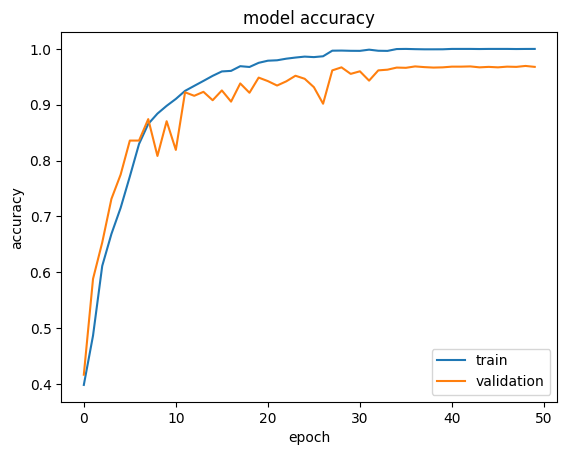

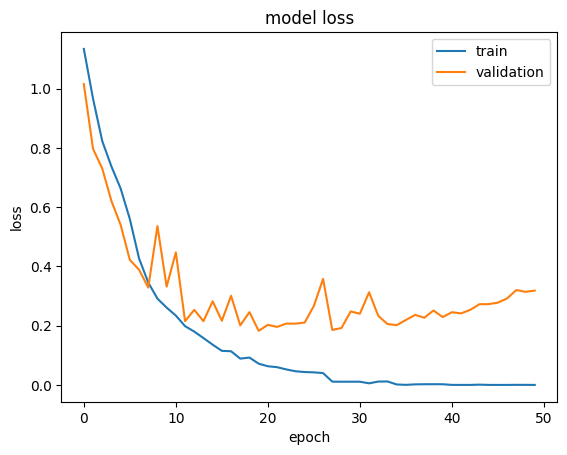

In [77]:
print(history.keys())
#  "Accuracy"
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# "Loss"
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [78]:
# print(history.history.keys())
# #  "Accuracy"
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='lower right')
# plt.show()
# # "Loss"
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper right')
# plt.show()

In [64]:
Y_prob = model.predict(test_images)
print(Y_prob)

W0000 00:00:1729161218.816716  204775 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161218.818657  204775 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161218.821450  204775 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161218.823854  204775 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161218.825732  204775 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161218.828435  204775 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161218.831114  204775 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161218.838123  204775 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161218.841547  204775 gp

 1/89 ━━━━━━━━━━━━━━━━━━━━ 7:59 5s/step

W0000 00:00:1729161223.531585  204775 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161223.546058  204775 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161223.551138  204775 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161223.565778  204775 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161223.567393  204775 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161223.568976  204775 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161223.570933  204775 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161223.572562  204775 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729161223.574189  204775 gp

89/89 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step
[[3.4997192e-09 9.9999988e-01 2.7546911e-08 6.1853711e-08 4.6654627e-09]
 [9.9998140e-01 5.3028202e-06 2.1410321e-08 7.3318209e-12 1.3384119e-05]
 [9.9999928e-01 3.0415237e-07 4.9450583e-10 1.9013543e-14 3.8928064e-07]
 ...
 [9.9999881e-01 2.9025810e-07 9.0277530e-10 3.3316560e-14 8.9902045e-07]
 [7.8658732e-06 1.4874409e-07 9.2329532e-07 2.2964169e-07 9.9999082e-01]
 [9.9999928e-01 3.9101712e-07 6.2375255e-10 2.6567309e-14 3.9029027e-07]]


In [65]:
y_pred = np.argmax(Y_prob, axis=1)
y_pred

array([1, 0, 0, ..., 0, 4, 0])

In [66]:
np.argmax(test_one_hot, axis=1)

array([1, 0, 0, ..., 0, 4, 0])

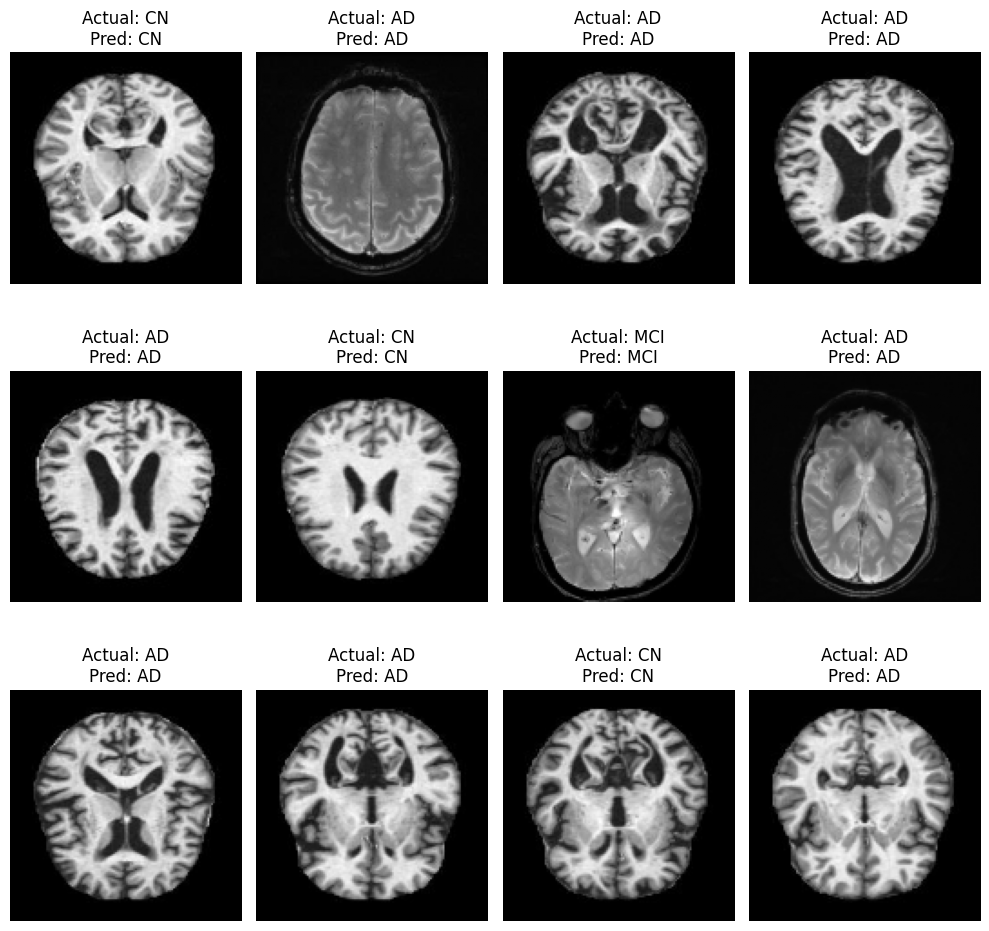

In [67]:
true_labels = test_encoded_labels#np.argmax(test_one_hot, axis=1)


num_images = min(12, len(test_images))  # Ensure we don't exceed the number of images available
columns = 4
rows = (num_images + columns - 1) // columns  
fig = plt.figure(figsize=(10, 10))
label_names = classes  

for i in range(1, num_images + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(test_images[i - 1])
#     actual_label = label_names[true_labels[i - 1]]
    actual_label = label_names[test_encoded_labels[i - 1]]
    predicted_label = label_names[y_pred[i - 1]]
    plt.title(f'Actual: {actual_label}\nPred: {predicted_label}')
    plt.axis('off')  

plt.tight_layout()
plt.show()

In [68]:
from sklearn.metrics import classification_report


# Compute accuracy score
report = classification_report(test_encoded_labels, y_pred, target_names=classes)

# Print classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

          AD       0.98      0.99      0.98      1252
          CN       0.99      0.99      0.99      1298
        EMCI       0.86      0.86      0.86        72
        LMCI       0.94      0.77      0.85        22
         MCI       0.93      0.88      0.91       173

    accuracy                           0.98      2817
   macro avg       0.94      0.90      0.92      2817
weighted avg       0.98      0.98      0.98      2817



In [69]:
def calculate_metrics(pred_classes, gt_classes):
    


    accuracy = np.mean(pred_classes == gt_classes)

   
    confusion_matrix = np.zeros((5, 5), dtype=int)
    np.add.at(confusion_matrix, (gt_classes, pred_classes), 1)

    sensitivity = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)

    true_negatives = np.sum(confusion_matrix) - np.sum(np.diag(confusion_matrix))
    specificity = true_negatives / (np.sum(confusion_matrix) - np.sum(np.diag(confusion_matrix)))

    metrics = {
        'accuracy': accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity
    }
    
    return metrics

In [70]:
print(calculate_metrics(y_pred, test_encoded_labels))

{'accuracy': 0.9779907703230387, 'sensitivity': array([0.98642173, 0.99229584, 0.86111111, 0.77272727, 0.88439306]), 'specificity': 1.0}


In [71]:
def plot_confusion_matrix (cm):
    plt.figure(figsize = (10,10))
    sns.heatmap(
        cm, 
        cmap = 'Reds', 
        linecolor = 'black', 
        linewidth = 1, 
        annot = True, 
        fmt = '', 
        xticklabels = classes, 
        yticklabels = classes)
    
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()
    


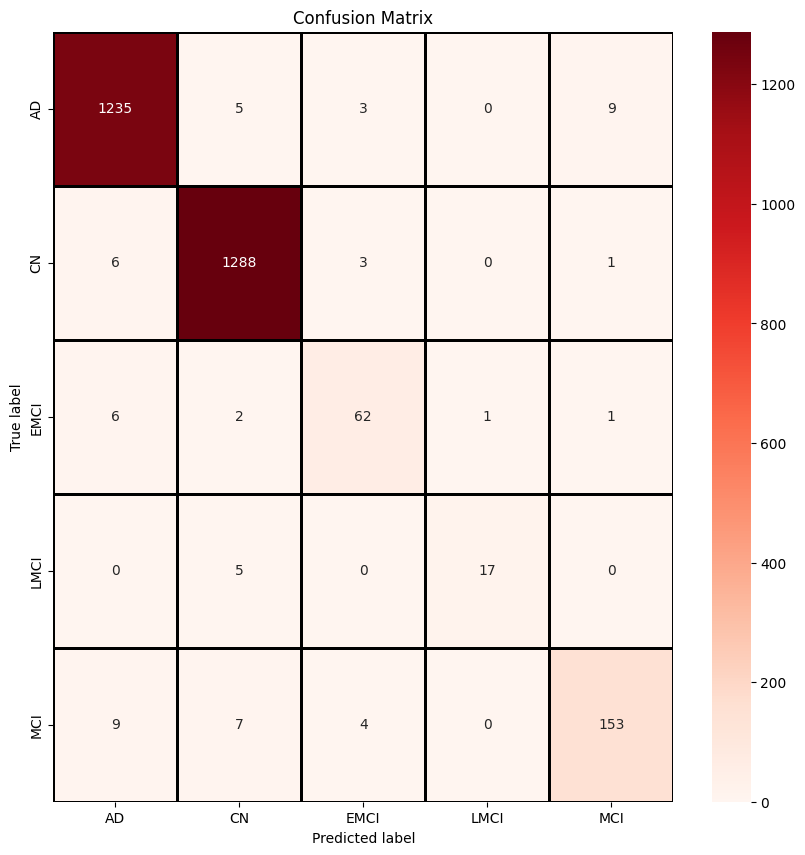

In [72]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(confusion_matrix(test_encoded_labels, y_pred))

In [73]:
def plot_confusion_matrix_perc(cm, classes):
    # Convert confusion matrix to percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        cm_percentage, 
        cmap='Reds', 
        linecolor='black', 
        linewidth=1, 
        annot=True, 
        fmt='.2f',  # format the annotations to 2 decimal places
        xticklabels=classes, 
        yticklabels=classes
    )
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix (Percentage)')
    plt.show()

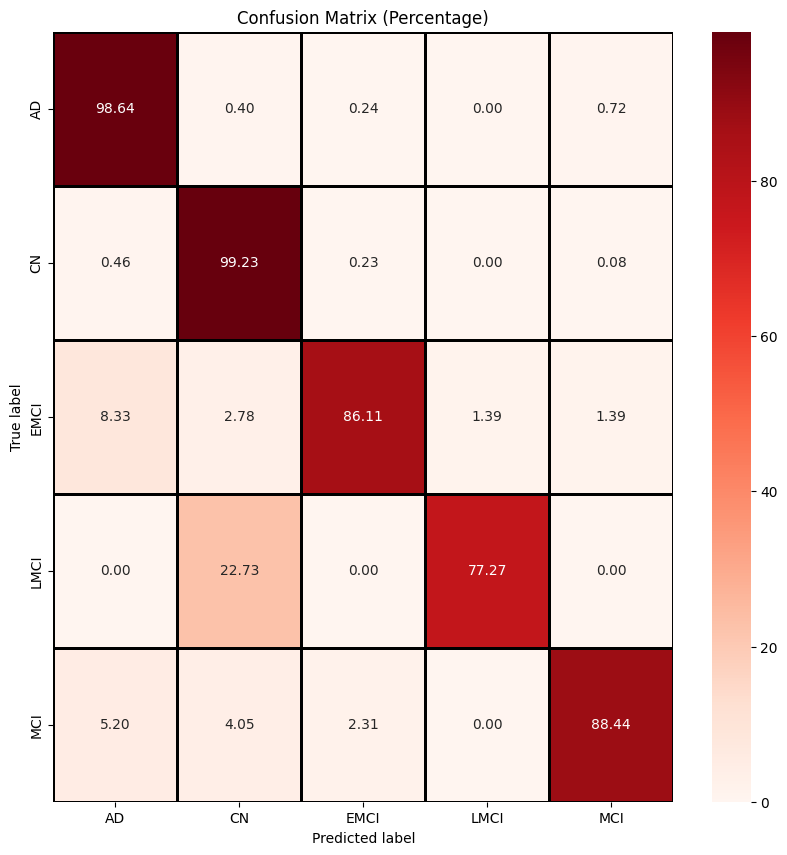

In [74]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix_perc(confusion_matrix(test_encoded_labels, y_pred), classes)